Презентация: https://disk.yandex.com.am/client/disk/Презентации

Дашборд: https://public.tableau.com/app/profile/.38192900/viz/dash_bank_16932341270900/Dashboard1?publish=yes

# Анализ оттока клиентов банка "Метанпром"

**Описание проекта:**

Необходимо проанализировать данные о клиентах регионального банка "Метанпром" и выделить сегменты клиентов, которые склонны уходить из банка.

**Цель проекта:**

Выявить все значимые признаки отточности клиентов, на их основе выделить сегменты клиентов, склонные к оттоку, и
дать по ним рекомендации отделу маркетинга в целях снижения уровня оттока.

**Задачи проекта:**

    
1) Провести исследовательский анализ данных в части анализа распределения признаков в разрезе оттока клиентов, в части анализа типичных портретов клиентов, корреляционного анализа.
 
2) Проверить статистические гипотезы о различии дохода между клиентами, которые ушли и которые остались, а также о том, что средний балл кредитного скоринга клиентов, которые ушли, меньше 700.

3) Сегментировать клиентов по признакам отточности.

4) Дать рекомендации по работе с сегментами.

**План (декомпозиция) анализа данных:**

1. Загрузка файла с данными и изучение общей информации.


2. Предобработка данных.

3. Проведение исследовательского анализа данных:

 3.1. анализ распределения признаков в разрезе оттока клиентов
 
 3.2. анализ типичных портретов клиентов в разрезе оттока
 
 3.3. анализ корреляции признаков между собой
    
4. Проверка гипотез:

 4.1. проверить гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались;
 
 4.2. проверить гипотезу о том, что среднее количество продуктов, которыми пользуется клиент, разное для клиентов, которые ушли и которые остались.
 
5. Подведение промежуточных итогов.

6. Сегментация клиентов по признакам отточности.

7. Приоритизация сегментов.

8. Рекомендации по работе с сегментами.

## Загрузка файла с данными и изучение общей информации

In [1]:
#импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st 
import numpy as np

In [2]:
##загружаем файл bank_scrooge в переменную data
data = pd.read_csv('/datasets/bank_scrooge.csv')

In [3]:
#создаем функцию для выполнения предобработки данных
def preprocesing(df):
    #выводим на экран сводную информацию о таблице
    print('Сводная информация о таблице:')
    print(df.info())
    print()
    #выводим на экран уникальные значения столбцов датафрейма
    columns = list(df)
    for i in columns:
        print(f'Уникальные значения столбца {i}:')
        print(sorted(df[i].unique()))
        print()
    #выводим на экран количество пропущенных значений в таблице
    print('Количество пропущенных значений в таблице:')    
    print(df.isna().sum())
    print()
    #выводим на экран количество дубликатов в таблице
    print('Количество дубликатов в таблице:', df.duplicated().sum())
    print()
    #выводим на экран первые пять строк датафрейма
    print('Вывод первых десяти строк на экран:')
    display(df.head(10))      

In [4]:
#вызываем функцию preprocesing для датафрейма data
preprocesing(data)

Сводная информация о таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB
None

Уникальные значения столбца USERID:
[94561, 94590, 95384, 95627, 96267, 96404, 96562, 96679, 97131, 97550, 97557, 97604, 97901, 97927, 97939, 98287, 98741, 99111, 99585, 99721,

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
5,202305,856.0,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0
6,177259,807.0,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,0
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
8,211686,923.0,Ярославль,М,54.0,5,1206337.87,2,1,0,155371.79,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0


**Выводы по п.1.:**
    
    
Анализ общей информации по файлу с данными: файл с данными содержит 10000 строк и 12 столбцов, типы данных в которых object, int и float. Дубликаты в данных не обнаружены, но обнаружены в ряде столбцов пропущенные данные. Также выявлено, что некорректно указаны наименования колонок (заглавными буквами).

## Предобработка данных

- **корректировка названия столбцов**

In [5]:
#приводим названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()

- **проверка на неявные дубликаты**

In [6]:
# проверяем на неявные дубликаты столбец userid
data_dubl = data[data.duplicated(['userid'], keep=False)]
pd.set_option('display.max_rows', None)
data_dubl

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
58,164676,860.0,Ярославль,М,37.0,5,648594.03,2,1,1,213586.86,1
150,185748,850.0,Рыбинск,М,36.0,5,1203376.67,2,0,1,89401.82,1
161,197364,928.0,Рыбинск,Ж,53.0,6,1347183.86,2,0,1,168189.49,1
231,190253,823.0,Рыбинск,М,37.0,4,373348.39,2,0,1,131947.92,1
431,214031,856.0,Рыбинск,М,36.0,2,386426.67,4,1,1,72767.85,0
440,221197,663.0,Рыбинск,М,27.0,0,NaN,1,1,1,172573.13,0
690,152479,768.0,Рыбинск,Ж,42.0,0,126787.79,4,1,1,143233.23,1
790,170312,901.0,Ярославль,М,33.0,4,3276783.93,3,0,1,358700.96,1
869,210662,962.0,Ярославль,Ж,54.0,5,5069231.39,1,1,1,955144.85,1


In [7]:
#выводим на экран два дубликата по userid=210627 для проверки 
data_dubl[data_dubl['userid'] == 210627]

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
7453,210627,864.0,Ярославль,Ж,38.0,4,1527225.32,4,1,1,162999.17,1
8521,210627,804.0,Рыбинск,М,30.0,2,347818.88,3,1,0,129015.25,0


- **кодирование признаков и формирование матрицы корреляций признаков с пропущенными значениями**

In [8]:
#делаем копию исходного датафрейма
data_cod = data.copy()
#кодируем столбцы city и gender
data_cod = pd.get_dummies(data_cod, columns=['city', 'gender'])

In [9]:
#создаем бинарный признак для пропущенных значений в столбцах balance
data_cod['Nan_balance'] = np.where(data_cod['balance'].isnull(), 0, 1)
#создаем бинарный признак для пропущенных значений в столбцах age
data_cod['Nan_age'] = np.where(data_cod['age'].isnull(), 0, 1)
#переводим в числовой формат столбцы Nan_balance и Nan_age
data_cod[['Nan_balance', 'Nan_age']] = data_cod[['Nan_balance', 'Nan_age']].apply(pd.to_numeric)
#выводим на экран датафрейм для проверки результата
data_cod.head()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_Ростов,city_Рыбинск,city_Ярославль,gender_Ж,gender_М,Nan_balance,Nan_age
0,183012,850.0,25.0,1,59214.82,2,0,1,75719.14,1,0,1,0,1,0,1,1
1,146556,861.0,37.0,5,850594.33,3,1,0,86621.77,0,0,1,0,1,0,1,1
2,120722,892.0,30.0,0,NaN,1,1,1,107683.34,0,0,1,0,1,0,0,1
3,225363,866.0,51.0,5,1524746.26,2,0,1,174423.53,1,0,0,1,1,0,1,1
4,157978,730.0,34.0,5,174.00,1,1,0,67353.16,1,0,0,1,0,1,1,1


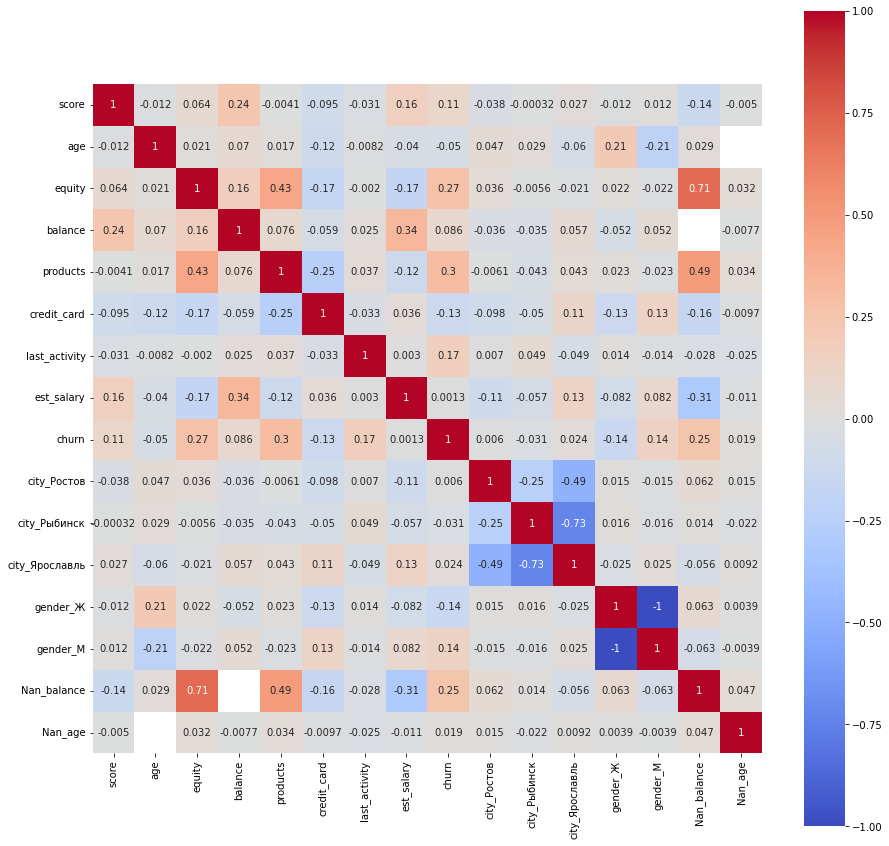

In [10]:
#удалим столбцы с бинарными признаками пропущенных значений
data_cod = data_cod.drop(['userid'], axis=1)
#построим и отрисуем матрицу корреляций для оценки зависимости пропусков от данных
cm = data_cod.corr()#вычисляем матрицу корреляций
#нарисуем тепловую карту с подписями для матрицы корреляций 
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, square=True, cmap='coolwarm', center=0)
plt.show();

- **расчет процента пропусков по категориальным столбцам**

In [11]:
#делаем копию исходного датафрейма
data_isna = data.copy()
#создаем бинарный признак для пропущенных значений в столбцах balance
data_isna['Nan_balance'] = np.where(data_isna['balance'].isnull(), 0, 1)
#переводим в числовой формат столбцы Nan_balance 
data_isna[['Nan_balance']] = data_isna[['Nan_balance']].apply(pd.to_numeric)

data_cat = data_isna[data_isna['Nan_balance'] == 0]
display(data_cat.shape)

def count_isna(column):
    result = data_cat.pivot_table(index=column, values='userid', aggfunc='count', margins=True).reset_index()
    return result    

(2295, 13)

In [12]:
count_isna('city')

,city,userid
0,Ростов,235
1,Рыбинск,593
2,Ярославль,1467
3,All,2295


**Процент пропусков в разбивке по городам:**

- Ростов - 10%
- Рыбинск - 26%
- Ярославль - 64%

In [13]:
count_isna('gender')

,gender,userid
0,Ж,1013
1,М,1282
2,All,2295


**Процент пропусков в разбивке по полу:**

- Женщины - 44%
- Мужчины - 56%

In [14]:
count_isna('credit_card')

,credit_card,userid
0,0,423
1,1,1872
2,All,2295


**Процент пропусков в разбивке по наличию кредитной карты:**

- Нет кредитной карты - 18%
- Есть кредитная карта - 82%

In [15]:
count_isna('last_activity')

,last_activity,userid
0,0,1034
1,1,1261
2,All,2295


**Процент пропусков в разбивке по наличию активности клиента:**

- клиент неактивен - 45%
- клиент активен - 55%

- **удаление пропущенных значений в столбце age и смена типа данных**

In [16]:
#удаляем пропущенные данные в столбце age
data = data.dropna(subset=['age'])
#меняем тип данных на int в столбце age
data['age'] = data['age'].astype(int)

In [17]:
#выводим на экран общую информацию для проверки результата
data.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9974 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         9974 non-null   int64  
 1   score          9974 non-null   float64
 2   city           9974 non-null   object 
 3   gender         9974 non-null   object 
 4   age            9974 non-null   int32  
 5   equity         9974 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9974 non-null   int64  
 8   credit_card    9974 non-null   int64  
 9   last_activity  9974 non-null   int64  
 10  est_salary     9974 non-null   float64
 11  churn          9974 non-null   int64  
dtypes: float64(3), int32(1), int64(6), object(2)
memory usage: 974.0+ KB


- **формирование диаграммы размаха для анализа наличия выбросов**

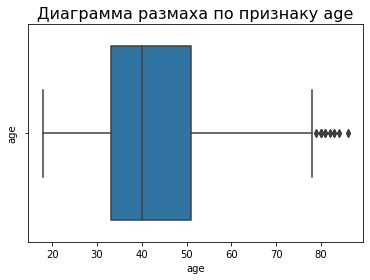

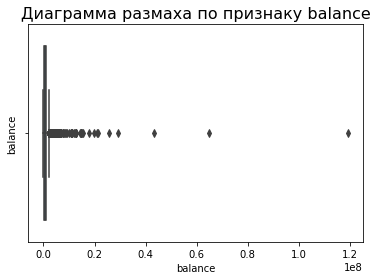

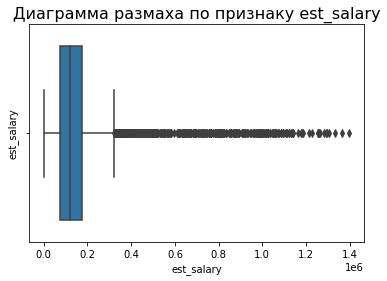

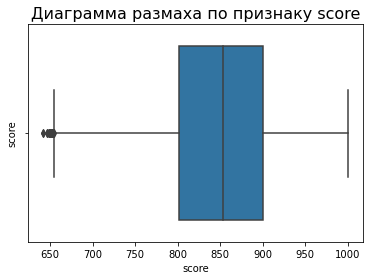

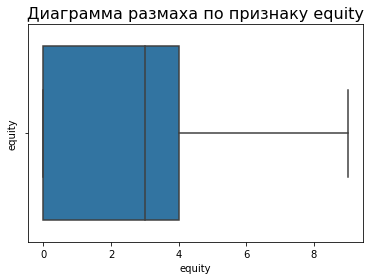

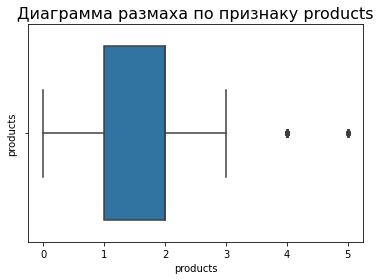

In [18]:
#для указанных столбцов формируем диаграмму размаха для анализа наличия выбросов
for column in ['age', 'balance', 'est_salary', 'score', 'equity', 'products']:
    sns.boxplot(x=column, data=data)
    plt.title(f'Диаграмма размаха по признаку {column}', fontsize = 16, color = 'black')
    plt.ylabel(f'{column}')
    plt.show();

**Выводы по п.2.:**
    

В результате предобработки данных были приведены названия столбцов к нижнему регистру.

Также были обнаружены дубликаты в столбце userid. Анализ этих дубликатных значений показал, что повторяющиеся значения связаны с разными клиентами, которые посещали банк в Ярославле и в городе Рыбинске. Таким образом, никакие действия с данными клиентами проводить не будем, оставим все как есть.

В части анализа пропущенных значений: закодировали признаки  city и gender, а также создали бинарные признаки пропущенных значений по столбцам age и balance - для отрисовки матрицы корреляций пропущенных значений.

Матрица корреляций показывает, что зависимость пропусков в столбце age от данных отсутствует (корреляция слабая), а вот зависимость пропусков в столбце balance от данных в столбце equity заметная (0.71), а также умеренная зависимость от данных в столбце products(0.49).

Пропущенные значения в столбце age, возможно, можно было бы восстановить, если бы у нас была информация о ФИО клиента. Но поскольку мы не обладаем этой информацией, то удалим 26 пропущенных значений в столбце age , так как количество строк с пропусками мало (меньше 1%) и согласно корреляции не зависит от данных. 

В столбце balance удалять значения не будем, так как количество пропущенных строк значительно (приблизительно 23%), а также эти пропуски коррелируют с другими данными, и удаление их может повлиять на результаты анализа.

Анализ влияния категориальных признаков  на пропуски в столбце balance показал, что признаки city, gender, last_activity особо не влияют на пропуски в балансе клиента, а вот признак credit_card влияет на пропуски в балансе (82% наблюдений с пропусками относятся к клиентам, у которых есть кредитная карта). Здесь есть явная зависимость.

Данные в столбце age были приведены к типу int, чтобы данные о возрасте выводились корректно, а не с плавающей точкой в типе float.

Анализ диаграммы размаха на выбросы показал, что выбросы присутствуют практически во всех числовых столбцах, кроме equity, но исследованию они не помешают, поэтому удалять их не будем. Но информация пригодится нам для формирования таблицы по общему портрету клиента.

## Исследовательский анализ данных

### Анализ распределения признаков в разрезе оттока клиентов

In [19]:
#считаем средний отток в целом по банку
mean_bank = data['churn'].sum() / data['churn'].count() 
print('Отток в среднем по банку:', mean_bank)

Отток в среднем по банку: 0.18237417284940846


In [20]:
#создадим функцию, с помощью которой построим столбчатую диаграмму распределения категориальных и дискретных признаков в разрезе оттока клиентов
def category_column(column):
    sns.barplot(data=data, x=column , y='churn')
    plt.title(f'Распределение признака {column} в разрезе оттока клиентов', fontsize = 16, color = 'black')
    plt.axhline(y=0.18)
    plt.show()      

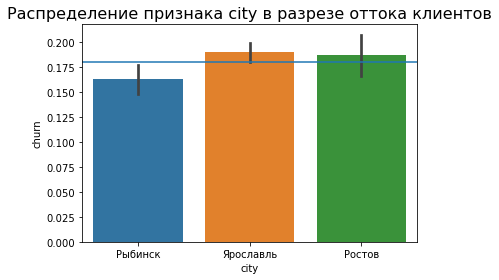

In [21]:
#вызовем функцию category_column для признака city
category_column('city')

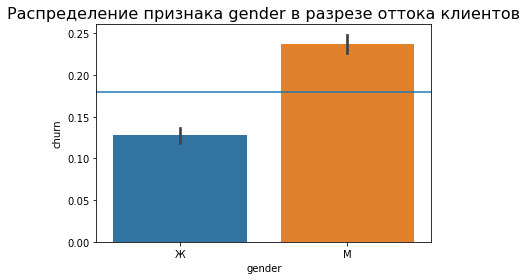

In [22]:
#вызовем функцию category_column для признака gender
category_column('gender')

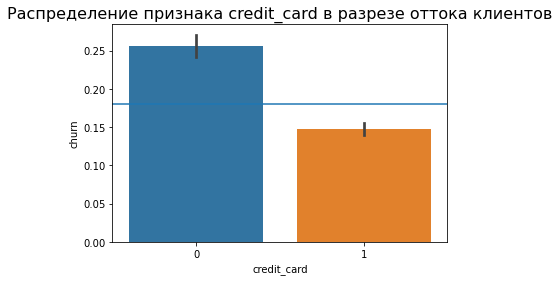

In [23]:
#вызовем функцию category_column для признака credit_card
category_column('credit_card')

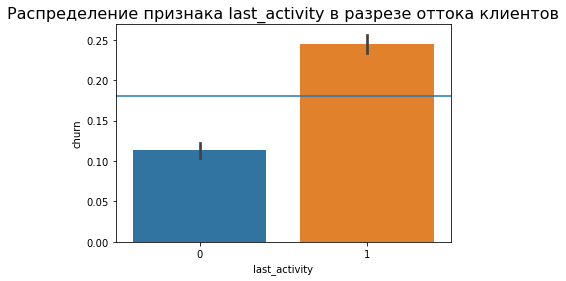

In [24]:
#вызовем функцию category_column для признака last_activity
category_column('last_activity')

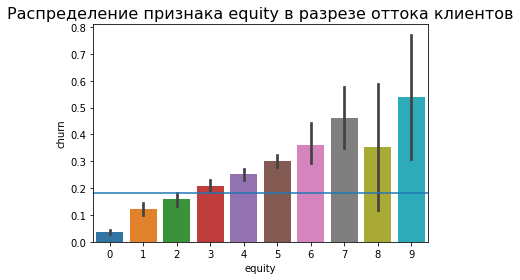

In [25]:
#вызовем функцию category_column для признака equity
category_column('equity')

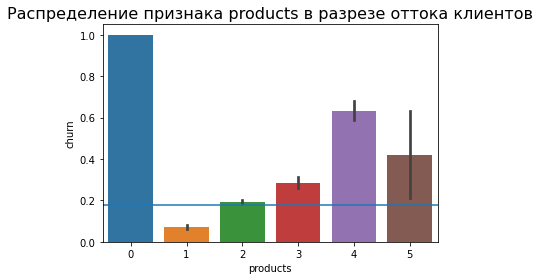

In [26]:
#вызовем функцию category_column для признака products
category_column('products')

In [27]:
#создадим функцию, с помощью которой построим гистограмму распределения числовых признаков score и age в разрезе оттока клиентов
def number_column(column):
    sns.histplot(data=data, x=column, hue='churn', stat="density", common_norm=False, bins=int((max(data[column]) - min(data[column])) + 1))
    plt.title(f'Распределение признака {column} в разрезе оттока клиентов', fontsize = 16, color = 'black')
    plt.axhline()
    plt.show()

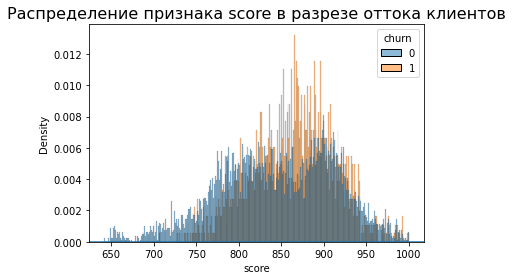

In [28]:
#вызовем функцию number_column для признака score
number_column('score')

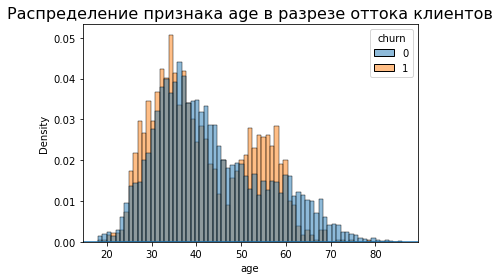

In [29]:
#вызовем функцию number_column для признака age
number_column('age')

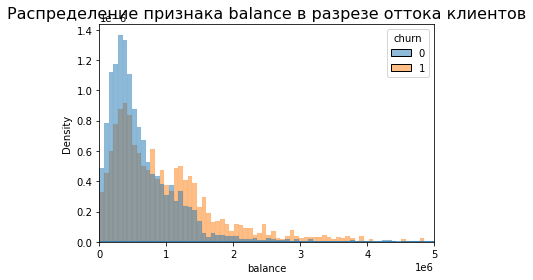

In [30]:
#создадим функцию, с помощью которой построим гистограмму распределения числовых признаков в разрезе оттока клиентов
sns.histplot(data=data, x='balance', hue='churn', stat="density", common_norm=False)
plt.title(f'Распределение признака balance в разрезе оттока клиентов', fontsize = 16, color = 'black')
plt.axhline()
plt.xlim(0, 5000000)
plt.show()        
 

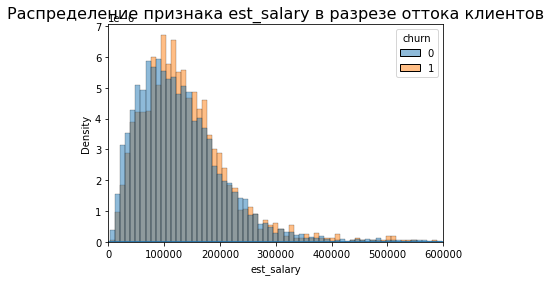

In [31]:
#создадим функцию, с помощью которой построим гистограмму распределения числовых признаков в разрезе оттока клиентов
sns.histplot(data=data, x='est_salary', hue='churn', stat="density", common_norm=False)
plt.title(f'Распределение признака est_salary в разрезе оттока клиентов', fontsize = 16, color = 'black')
plt.axhline()
plt.xlim(0, 600000)
plt.show()   

**Выводы по п.3.1.:**


Анализ распределения признаков в разрезе оттока клиентов показал:
 - признак city - в городах Ярославль и Ростов отток чуть выше, чем по банку(при этом Ярославль лидирует в части оттока)
 - признак gender - мужчины более склонны к оттоку, чем женщины
 - признак credit_card - более склонны к оттоку те клиенты, у которых нет кредитных карт
 - признак last_activity - более склонны к оттоку более активные клиенты
 - признак equity - чем выше количество объектов в собственности (как правило, более 3-х объектов в собственности), тем выше склонность к оттоку у таких клиентов
 - признак products -  более склонны к оттоку клиенты, которые имеют 3 и больше продуктов банка. Здесь следует отметить, что есть один клиент, по которому количество клиентов банка равно нулю. Скорее всего, это аномалия. Если бы это наблюдение влияло на наше дальнейшее исследование, то мы бы его удалили. Но так как оно не влияет на наше результирующее исследование, оставим как есть.
 
 - признак score - отток выше у клиентов, которые имеют баллы кредитного скоринга от 820 до 910
 - признак age - отток выше у клиентов в возрасте от 25 до 35 лет, а также в возрасте от 50 до 60 лет
 - признак balance - отток выше у клиентов, остаток на счете у которых от 1 до 4 млн.руб.
 - признак est_salary - отток выше у клиентов с заработной платой от 100000 до 200000 руб 

### Анализ типичного портрета клиента в разрезе оттока

In [32]:
#создадим сводную таблицу, в которой в столбцах будет признак отточности, а построчно все остальные числовые признаки,
#по которым посчитаем медиану и/или среднее
data_portrait = data.pivot_table(columns=['churn'],
                                 values=['credit_card', 'last_activity', 'equity', 'products', 'score', 'age', 'balance',\
                                         'est_salary'],
                                 aggfunc={'age' : ['mean', 'median'], 'balance': ['mean', 'median'], 'credit_card': 'median',\
                                          'equity' : 'median', 'est_salary' : ['mean', 'median'], 'last_activity' : 'median', \
                                          'products' : 'median', 'score' : ['mean', 'median']}).reset_index()
                                   
#убираем экспоненциальные числа
pd.set_option('display.float_format', lambda x: '%.2f' % x)
#переименуем столбцы в сводной таблице data_portrait
data_portrait.columns=['Признак', 'Показатель', 'Отток', 'Не отток']
#посчитаем относительную разницу между оттоком и неоттоком
data_portrait['Относительная разница'] = ((data_portrait['Не отток'] - data_portrait['Отток']) / data_portrait['Не отток'])
#создадим сводную таблицк, в которой в столбцах будет признак отточности, а построчно категориальные показатели, по которым посчитаем моду
data_mode = data.pivot_table(columns='churn', values=['city', 'gender'], aggfunc={'city': pd.Series.mode, \
                                                                                  'gender' : pd.Series.mode}).reset_index()
#переименуем столбцы в сводной таблице data_mode                                                                                  
data_mode.columns=['Признак', 'Отток', 'Не отток'] 

In [33]:
#с помощью конкатенации объединим датафреймы
pd.concat([data_portrait, data_mode], axis=0, ignore_index=True)

,Признак,Показатель,Отток,Не отток,Относительная разница
0,age,mean,43.02,41.45,-0.04
1,age,median,40.00,39.00,-0.03
2,balance,mean,733031.63,1134458.21,0.35
3,balance,median,475410.09,783908.90,0.39
4,credit_card,median,1.00,1.00,0.00
5,equity,median,3.00,4.00,0.25
6,est_salary,mean,147674.64,148289.70,0.00
7,est_salary,median,118227.60,125395.22,0.06
8,last_activity,median,0.00,1.00,1.00
9,products,median,2.00,2.00,0.00


**Выводы по п.3.2.:**

Типичные портреты клиентов, кто ушел и кто остался, можно описать следующими мерами центральной тенденции:

Клиенты, склонные к отточности:
- средний возраст - 40 лет
- по гендерной принадлежности - женщины
- посещали офис в Ярославле
- имеют кредитную карту
- имеют в среднем 3 объекта в собственности
- относятся к неактивным клиентам
- средний балл кредитного скоринга - 848 баллов
- средняя зарплата - 118227 руб.
- используют в среднем 2 продукта банка
- остаток на счете в среднем - 475410,09 руб.


Клиенты, не склонные к отточности:
- средний возраст - 39 лет
- по гендерной принадлежности - мужчины
- посещали офис в Ярославле
- имеют кредитную карту
- имеют в среднем 4 объекта в собственности
- относятся к активным клиентам
- средний балл кредитного скоринга - 866 баллов
- средняя зарплата - 125395,22 руб.
- используют в среднем 2 продукта банка
- остаток на счете в среднем - 783908,90 руб.

### Анализ корреляции признаков между собой

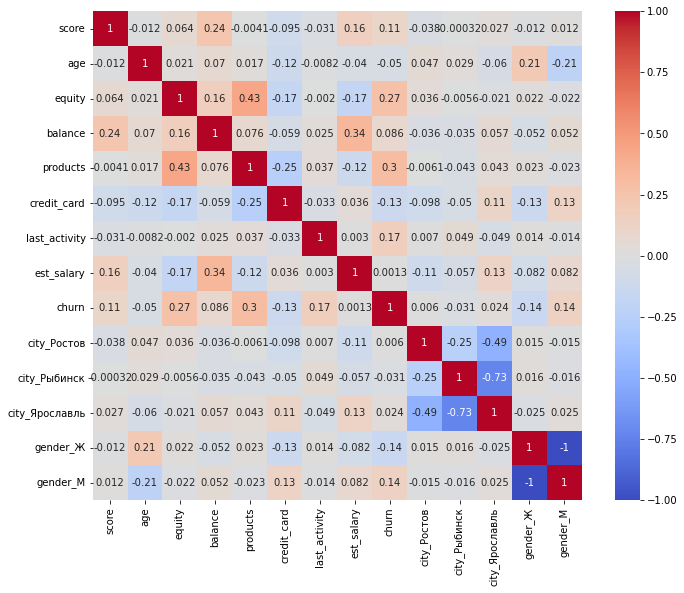

In [34]:
#удалим столбцы с бинарными признаками пропущенных значений
data_cod = data_cod.drop(['Nan_balance', 'Nan_age'], axis=1)
#построим и отрисуем матрицу корреляций
cm = data_cod.corr()#вычисляем матрицу корреляций
#нарисуем тепловую карту с подписями для матрицы корреляций 
plt.figure(figsize=(12, 9))
sns.heatmap(cm, annot=True, square=True, cmap='coolwarm', center=0)
plt.show();

**Выводы по п.3.3:**
    
  
Анализ корреляции показал, что в основном, все признаки слабо коррелируют друг с другом. Однако присутствует умеренная корреляция между признаками products и equity(0.43), balance и est_salary(0.34). Но особое внимание стоит обратить на корреляцию на границе между слабой и умеренной: между признаком оттока по банку и количеством продуктов (products) - 0.3 и между признаком оттока по банку и количеством объектов в собственности (equity) - 0.27 (~0.3).  

## Проверка статистических гипотез

### Проверка гипотезы о различии дохода между теми клиентами, которые ушли и теми, которые остались

**Выдвинем гипотезы:**

Н0 - нет различий, то есть средний доход между теми клиентами, которые ушли и теми, которые остались, одинаковые

Н1 - есть различия, то есть средний доход между теми клиентами, которые ушли и теми, которые остались, разные

In [35]:
#сохраняем в отдельных переменных  доход по клиентам, которые ушли и которые остались
churn_ = data.loc[data['churn'] == 1]['est_salary']
churn_not = data.loc[data['churn'] == 0]['est_salary']
#задаем пороговое значение уровня статистической значимости
alpha = 0.05

In [36]:
#проводим статистический тест
results = st.ttest_ind(churn_, churn_not, equal_var=False)
#выводим на экран значение pvalue
print('p_значение:', results.pvalue)
#с помощью условного оператора сравниваем pvalue с alpha и выводим на экран получившийся результат
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


p_значение: 0.8515799588935961
Не получилось отвергнуть нулевую гипотезу


**Выводы по п.4.1.:**


Так как нам нужно было проверить равенство средних двух наборов данных, то для проведения теста мы использовали метод st.ttest_ind (который проверяет гипотезу о равенстве средних двух генеральных совокупностей).

ttest мы можем применить при проверке гипотезы о равенстве средних доходов клиентов, так как сравниваются не зависящие друг от друга данные, выборочные средние нормально распределены благодаря центральной предельной теореме (если размер выборки составляет хотя бы несколько десятков значений, выборочные средние, которые можно получить из одной и той же генеральной совокупности, будут распределены нормально вокруг истинного среднего этой совокупности). Поскольку выборки у нас разного размера (8155 и 1819 значений) дисперсии генеральных совокупностей, скорее всего, разные, то параметр equal_var укажем как False, чтобы тест посчитал дисперсии выборок по отдельности.  

Перед началом расчета выдвинули нулевую гипотезу о том, что средний доход клиентов, которые ушли и которые остались, одинаковые, и альтернативную гипотезу о том, что средний доход клиентов, которые ушли и которые остались, разный.

В результате проведения теста получили, что значение pvalue > alpha, то есть не получилось отвергнуть нулевую гипотезу - таким образом, значимых различий между средним доходом клиентов, которые ушли и которые остались, нет.

### Проверка гипотезы о том, что среднее количество продуктов, которыми пользуется клиент, разное для клиентов, которые ушли и которые остались

**Выдвинем гипотезы:**

Н0 - нет различий, то есть среднее количество продуктов, которыми пользуется клиент, одинаковое для клиентов, которые ушли и которые остались

Н1 - есть различия, то есть среднее количество продуктов, которыми пользуется клиент, разное для клиентов, которые ушли и которые остались

In [37]:
#сохраняем в отдельных переменных  количество продуктов по клиентам, которые ушли и которые остались
churn_ = data.loc[data['churn'] == 1]['products']
churn_not = data.loc[data['churn'] == 0]['products']
#задаем пороговое значение уровня статистической значимости
alpha = 0.05

In [38]:
#проводим статистический тест
results = st.ttest_ind(churn_, churn_not, equal_var=False)
#выводим на экран значение pvalue
print('p_значение:', results.pvalue)
#с помощью условного оператора сравниваем pvalue с alpha и выводим на экран получившийся результат
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


p_значение: 7.537464337201274e-138
Отвергаем нулевую гипотезу


**Выводы по п.4.2.:**


Так как нам нужно было проверить равенство средних двух наборов данных, то для проведения теста мы использовали метод st.ttest_ind (который проверяет гипотезу о равенстве средних двух генеральных совокупностей).

ttest мы можем применить при проверке гипотезы о равенстве средних доходов клиентов, так как сравниваются не зависящие друг от друга данные, выборочные средние нормально распределены благодаря центральной предельной теореме (если размер выборки составляет хотя бы несколько десятков значений, выборочные средние, которые можно получить из одной и той же генеральной совокупности, будут распределены нормально вокруг истинного среднего этой совокупности). Поскольку выборки у нас разного размера (8155 и 1819 значений) дисперсии генеральных совокупностей, скорее всего, разные, то параметр equal_var укажем как False, чтобы тест посчитал дисперсии выборок по отдельности.  

Перед началом расчета выдвинули нулевую гипотезу о том, что среднее количество продуктов, которыми пользуется клиент, одинаковое для клиентов, которые ушли и которые остались, и альтернативную гипотезу о том, что среднее количество продуктов, которыми пользуется клиент, разное для клиентов, которые ушли и которые остались.

В результате проведения теста получили, что значение pvalue > alpha, то есть отвергаем нулевую гипотезу - таким образом, существуют статистически значимые различия между средним количеством продуктов у клиентов, которые ушли и теми, которые остались.

## Подведение промежуточных итогов

На основании проведенного исследовательского анализа данных (анализа распределения клиентов в разрезе оттока, анализа корреляций признаков между собой), а также на основании проверки гипотез отберем признаки, которые лягут в основу нашей сегментации:

1) Количество продуктов, которыми пользуется клиент:  products >= 3

2) Наличие кредитной карты: credit_card = 0

3) Количество объектов в собственности: equity > 3

4) Возраст: интервал 50 < age < 60, а также интервал 25 < age < 35

5) Пол: gender = М

По всем этим признакам, согласно результатам работы в прошлых блоках, отток выше, чем отток в среднем по банку.

## Сегментация клиентов по признакам отточности

Проранжированные в порядке убывания оттока, признаки объединим в три сегмента, каждый из которых будет включать два признака.

**Сегмент 1:**


**Признаки и их значения/интервалы:**

- количество продуктов, которыми пользуется клиент - больше или равно 3

- количество объектов в собственности  - больше 3

In [39]:
#делаем срез данных по условию для признаков
segment1 = data[(data['products'] >= 3) & (data['equity'] > 3)]
#строим сводную таблицу количества клиентов сегмента в разбивке по оттоку
segment1 = segment1.pivot_table(index='churn', values='userid', aggfunc='count', margins=True).reset_index()
#переименовываем столбцы сводной таблицы
segment1.columns = ['Индикатор оттока', 'Количество клиентов']
#выводим на экран сводную таблицу
segment1

,Индикатор оттока,Количество клиентов
0,0,526
1,1,426
2,All,952


Количество клиентов в сегменте: 952 чел.

Количество отточных клиентов в сегменте: 426 чел.

**Уровень оттока по сегменту 1 -  45%**

**Сегмент 2:**


**Признаки и их значения/интервалы:**

- возраст - в интервале от 50 до 60 лет

- наличие кредитной карты: нет

In [40]:
#делаем срез данных по условию для признаков
segment2 = data[(data['credit_card'] == 0) & ((data['age'] > 50) & (data['age'] < 60))] 
#строим сводную таблицу количества клиентов сегмента в разбивке по оттоку
segment2 = segment2.pivot_table(index='churn', values='userid', aggfunc='count', margins=True).reset_index()
#переименовываем столбцы сводной таблицы
segment2.columns = ['Индикатор оттока', 'Количество клиентов']
#выводим на экран сводную таблицу
segment2

,Индикатор оттока,Количество клиентов
0,0,358
1,1,212
2,All,570


Количество клиентов в сегменте: 570 чел.

Количество отточных клиентов в сегменте: 212 чел.

**Уровень оттока по сегменту 1 - 37%**

**Сегмент 3:**


**Признаки и их значения/интервалы:**

- по гендерной принадлежности - мужчины

- возраст в интервале от 25 до 35 лет

In [41]:
#делаем срез данных по условию для признаков
segment3 = data[(data['gender'] == 'М') & ((data['age'] > 25) & (data['age'] < 35))]
#строим сводную таблицу количества клиентов сегмента в разбивке по оттоку
segment3 = segment3.pivot_table(index='churn', values='userid', aggfunc='count', margins=True).reset_index()
#переименовываем столбцы сводной таблицы
segment3.columns = ['Индикатор оттока', 'Количество клиентов']
#выводим на экран сводную таблицу
segment3

,Индикатор оттока,Количество клиентов
0,0,1087
1,1,379
2,All,1466


Количество клиентов в сегменте: 1466 чел.

Количество отточных клиентов в сегменте: 379 чел.

**Уровень оттока по сегменту 1 - 26%**

## Приоритизация сегментов

Приоритизацию сегментов будем проводить по снижению процента оттока клиентов. 

В соответствии с этим в первую очередь следует рассматривать сегмент 1, затем сегмент 2, и в последнюю очередь сегмент 3.

## Рекомендации по работе с сегментами

**Рекомендации по работе с сегментом 1:**


- провести со страховыми компаниями работу по отмене страховых взносов (страхование жизни, страхование жилья) для клиентов сегмента при выдаче кредита
- в случае выдачи нового продукта  клиенту сегмента, снижать/повышать процентные ставки по кредитам/депозитам на несколько пунктов

**Рекомендации по работе с сегментом 2:**

- предлагать повышенные ставки по вкладам для пенсионеров/для пенсионных накоплений, так как возраст клиентов сегмента предпенсионный
- предлагать кредитные карты со сниженной ставкой, бОльшим сроком погашения 

**Рекомендации по работе с сегментом 3:**

- предлагать клиентам сегмента кредиты со сниженной ставкой на свадьбу, на покупку машины, на покупку жилья, так как, как правило, люди возраста от 25 до 35 чаще всего стремятся улучшить свои условия жизни

- проводить среди мужчин-клиентов розыгрыши сертификатов на несколько бесплатных заправок, сертификатов на автозапчасти и аксессуары для автомобиля